# Comparando modelos

Una comparación preliminar de los modelos.

In [2]:
# Módulos necesarios
import numpy as np
import seaborn
from scipy.integrate import odeint
from matplotlib import pyplot as plt

In [ ]:
%matplotlib # abre una ventana interactiva con más opciones
#%matplotlib notebook # Gráficas interactivas

In [9]:
%matplotlib inline

In [4]:
np.set_printoptions(precision=3)

## Paisaje

In [ ]:
# Parámetros iniciales
x_celdas = 10
y_celdas = 10
numerodemilpas = 50 # sería mejor intercambiar este valor por un porcentaje

In [ ]:
%run genera_tipo_matriz_agroecologica.py

In [ ]:
numerodemilpas = 95
paisaje = genera_tipo_matriz_agroecologica(x_celdas, y_celdas, n_bosque=5, 
                                           posicion_bosque=[(1,1),(1,8),(4,5),(8,1),(8,8)], 
                                           n_milpa=numerodemilpas, posicion_milpa="random")

In [ ]:
numerodemilpas = 92
paisaje_centro = genera_tipo_matriz_agroecologica(x_celdas, y_celdas, n_bosque=8, 
                                           posicion_bosque=[(3,4),(4,4),(5,4),(6,4),(3,5),(4,5),(5,5),(6,5)], 
                                           n_milpa=numerodemilpas, posicion_milpa="random")

In [ ]:
print paisaje_centro

## Comunidad

Diferentes comunidades para probar las simulaciones. Los archivos están en el mismo directorio.

In [ ]:
# Usé esta comunidad para las simulaciones de la presentación
"""
condiciones_iniciales = np.loadtxt("osFri-Jan-30-114717-2015-c.txt")
tasas_reproduccion = np.loadtxt("osFri-Jan-30-114717-2015-v.txt")
matriz_interacciones = np.loadtxt("osFri-Jan-30-114717-2015-m.txt")
""""""

In [ ]:
"""
condiciones_iniciales = np.loadtxt("osFri-Jan-30-114423-2015-c.txt")
tasas_reproduccion = np.loadtxt("osFri-Jan-30-114423-2015-v.txt")
matriz_interacciones = np.loadtxt("osFri-Jan-30-114423-2015-m.txt")
"""

In [ ]:
"""
condiciones_iniciales = np.loadtxt("osFri-Jan-30-120526-2015-c.txt")
tasas_reproduccion = np.loadtxt("osFri-Jan-30-120526-2015-v.txt")
matriz_interacciones = np.loadtxt("osFri-Jan-30-120526-2015-m.txt")
"""

In [ ]:
"""
condiciones_iniciales = np.loadtxt("osFri-Jan-30-121341-2015-c.txt")
tasas_reproduccion = np.loadtxt("osFri-Jan-30-121341-2015-v.txt")
matriz_interacciones = np.loadtxt("osFri-Jan-30-121341-2015-m.txt")
""""""

In [ ]:
"""
condiciones_iniciales = np.loadtxt("eqTue-Jan-27-155607-2015-c.txt")
tasas_reproduccion = np.loadtxt("eqTue-Jan-27-155607-2015-v.txt")
matriz_interacciones = np.loadtxt("eqTue-Jan-27-155607-2015-m.txt")
"""

### Identidades

In [ ]:
%run vector_identidades_2.py

In [ ]:
identidades = vector_identidades_2(matriz_interacciones)
print identidades

### Sistema Lotka-Volterra sin espacio

Modelo original:

In [ ]:
def d_lotkavolterra_alea(x, t, r_alea, a_alea): 
    """
    Ecuacion de lotka volterra generalizada ESTA ES LA QUE SE USA
    """
    dx = x * (r_alea + np.dot(a_alea, x))
    return dx

Modelo 2 - Incorporando la intensidad de manejo:

In [ ]:
def d_lotkavolterra_alea_3(x, t, r_alea, a_alea, manejo): 
    """
    Ecuacion de lotka volterra generalizada que incorpora la intensidad de manejo.
    **De esta forma, la población crece en forma proporcional al manejo.
    """
    dx = x * (manejo * r_alea + np.dot(a_alea, x))
    return dx

In [ ]:
t_total = 2000
t = np.linspace(0, t_total,t_total+1)

manejo = 1.0 # bosque
x = odeint(d_lotkavolterra_alea_3, condiciones_iniciales, t, 
           args=(tasas_reproduccion,matriz_interacciones, manejo))

manejo = 0.7 # milpa
y = odeint(d_lotkavolterra_alea_3, condiciones_iniciales, t, 
           args=(tasas_reproduccion,matriz_interacciones,manejo))

manejo = 0.4 # intensivo
z = odeint(d_lotkavolterra_alea_3, condiciones_iniciales, t, 
           args=(tasas_reproduccion,matriz_interacciones,manejo))

In [ ]:
#%matplotlib notebook
fig = plt.figure()
fig.add_subplot(111)
plt.plot(t, z[:, [0]], color="red")
plt.plot(t, y[:, [0]], color="green")
plt.plot(t, x[:, [0]], color="blue")
plt.show() 

Medidas de biodiversidad sin espacio:

In [ ]:
def riqueza_sin_espacio(poblacion, t=-1):
    n_especies = poblacion.shape[1]
    return ((sum([i>0.0001 for i in x[t]]))/(n_especies*1.0))*10

In [ ]:
print riqueza_sin_espacio(x)
print riqueza_sin_espacio(y)
print riqueza_sin_espacio(z)

In [ ]:
#%matplotlib inline
tiempo = np.arange(0, 2000)
riqueza0 = np.zeros_like(tiempo)

for t in tiempo:
    riqueza0[t] = riqueza_sin_espacio(y, t)

plt.plot(tiempo, riqueza0, color="green")
plt.ylim(ymax = 10, ymin = 0)
plt.xlim(xmax = 40)
plt.show() 

## Modelo

El toma como entrada un **paisaje** y una **comunidad**. 

Además, hay algunos parámetros que se pueden modificar, como las tasas de dispersión y de muerte diferencial, el tiempo total de simulación y las iteraciones de migración y muerte entre cada una de Lotka-Volterra.

### Parámetros comunes

In [ ]:
# Obtenemos el número de especies de la matriz de interacciones, que debe ser cuadrada
n_especies = matriz_interacciones.shape[1]

Disp = {'b':0.3, 'm':1.0, 'i':1.0} #tasas dipersión para el modelo original

# Disp = {'b':0.3, 'm':0.8, 'i':1.0} # tasas de dispersión para el modelo 2

m_milpa = 0.3 # tasa muerte negra
m_intensivo = 0.6 # tasa muerte blanca

h = 0.001 #diferencial de cambio en t (euler y graficas)
t_total = 1000 #tiempo total de simulacion
iter_difymuerte = 1 #iteraciones de dif y muerte entre cada una de lotka volterra

Lo siguiente es poblar el paisaje con las condiciones iniciales o con una población aleatoria. Se eligen condiciones iniciales para cada tipo de celda (bosque, milpa o intensivo). En este caso, al iniciar sólo hay individuos en los "bosques".

In [ ]:
%run genera_poblacion_inicial.py # el archivo debe estar en el mismo directorio

In [ ]:
poblacion_0 = genera_poblacion_inicial(paisaje, n_especies, 
                                       p0_bosque = condiciones_iniciales, p0_milpa=0, 
                                       p0_intensivo=0)

In [ ]:
from copy import deepcopy

In [ ]:
# Convertir el paisaje a un arreglo numérico para graficar
def paisaje_numerico(paisaje):
    
    paisaje_numerico = deepcopy(paisaje)
    for i in range(len(paisaje)):
            for j in range(len(paisaje[0])):
                if paisaje[i][j] == 'b': paisaje_numerico[i][j] = 1.
                if paisaje[i][j] == 'm': paisaje_numerico[i][j] = 1-m_milpa
                if paisaje[i][j] == 'i': paisaje_numerico[i][j] = 1-m_intensivo
    paisaje_numerico = np.array(paisaje_numerico)
    return paisaje_numerico

In [ ]:
paisaje_numerico1 = paisaje_numerico(paisaje)
paisaje_numerico2 = paisaje_numerico(paisaje_centro)

In [ ]:
seaborn.heatmap(paisaje_numerico2, cmap = "YlGn", vmin = 0, square=True)

### Medidas de biodiversidad

In [5]:
% run medidas_biodiversidad.py

** *Verificar:* ** Podemos tomar el máximo de la riqueza por celdas para obtener la riqueza del paisaje.
* Actualización: No se puede hacer esto. Observé casos donde la riqueza en todas las celdas era, por ejemplo, 6 y la riqueza del paisaje era de 7. Es decir, la población de alguna especie era menor a 0.001 en todas las celdas, pero al sumar en todo el paisaje era mayor a 0.001, por lo que se cuenta como viva.

## Modelo original

Se puede elegir entre `paisaje` o `paisaje_centro`.

In [ ]:
%run modelo.py

In [ ]:
poblacion1 = correr_2DMM(poblacion_0, 
                        paisaje_centro, 
                        t_total, 
                        n_especies, 
                        d_lotkavolterra_alea, 
                        tasas_reproduccion, 
                        matriz_interacciones, 
                        m_milpa, m_intensivo, Disp, 'vecinos8', iter_difymuerte = 1)

In [ ]:
#%matplotlib notebook
biomasa_celda_1 = medidas_por_celda(poblacion1)[0]
seaborn.heatmap(biomasa_celda_1, square=True, yticklabels=False,
               xticklabels=False)

In [ ]:
riqueza_paisaje_1 = riqueza_paisaje(poblacion1)[1]
print riqueza_paisaje_1
riqueza_celda_1 = medidas_por_celda(poblacion1)[1]
print riqueza_celda_1
seaborn.heatmap(riqueza_celda_1, vmin = 0, vmax = 10) # vmax = n_especies

## Modelo 2

En todos los parches ocurren interacciones ecológicas, es decir, los individuos se establecen en todos los parches. La dinámica de poblaciones depende de la intensidad de manejo del parche.
Usaré una tasa de dispersión del 80% en celdas con manejo agrícola (antes era del 100%), la misma comunidad, el mismo paisaje y el mismo valor `iter_difymuerte = 1`.

In [ ]:
%run modelo2.py

In [ ]:
poblacion2 = correr_2DMM_2(poblacion_0, 
                        paisaje_centro, 
                        t_total, 
                        n_especies, 
                        d_lotkavolterra_alea_3, 
                        tasas_reproduccion, 
                        matriz_interacciones,
                        m_milpa, m_intensivo, Disp, 'vecinos8', iter_difymuerte = 1)

In [ ]:
%matplotlib
biomasa_celda_2 = medidas_por_celda(poblacion2)[0]
seaborn.heatmap(biomasa_celda_2, square=True, yticklabels=False,
               xticklabels=False)

In [ ]:
riqueza_paisaje_2 = riqueza_paisaje(poblacion2)[1]
print riqueza_paisaje_2
riqueza_celda_2 = medidas_por_celda(poblacion2, 100)[1]
seaborn.heatmap(riqueza_celda_2, vmin = 0, vmax = 10)
print riqueza_celda_2

Aumentando la intensidad de manejo:

In [ ]:
# Obtenemos el número de especies de la matriz de interacciones, que debe ser cuadrada
n_especies = matriz_interacciones.shape[1]

Disp = {'b':0.3, 'm':0.8, 'i':1.0} #tasas dipersión para nueva función migracion_esp

# Disp = {'b':0.3, 'm':0.8, 'i':1.0}
m_milpa = 0.6 # tasa muerte negra cte o np.array 
                # (//¿por qué o para qué esto puede ser un arreglo?//)
m_intensivo = 0.6 # tasa muerte blanca cte o np.array

h = 0.001 #diferencial de cambio en t (euler y graficas)
t_total = 1000 #tiempo total de simulacion

iter_difymuerte = 1 #iteraciones de dif y muerte entre cada una de lotka volterra

poblacion3 = correr_2DMM_2(poblacion_0, 
                        paisaje, 
                        t_total, 
                        n_especies, 
                        d_lotkavolterra_alea_3, 
                        tasas_reproduccion, 
                        matriz_interacciones,
                        m_milpa, m_intensivo, Disp, 'vecinos8', iter_difymuerte = 1)

In [ ]:
riqueza_paisaje_3 = riqueza_paisaje(poblacion3)[1]
print riqueza_paisaje_3
riqueza_celda_3 = medidas_por_celda(poblacion3, 100)[1]
seaborn.heatmap(riqueza_celda_3, vmin = 0, vmax = 10)
print riqueza_celda_3

In [ ]:
# Obtenemos el número de especies de la matriz de interacciones, que debe ser cuadrada
n_especies = matriz_interacciones.shape[1]

Disp = {'b':0.3, 'm':0.8, 'i':1.0} #tasas dipersión para nueva función migracion_esp

# Disp = {'b':0.3, 'm':0.8, 'i':1.0}
m_milpa = 0.85 # tasa muerte negra cte o np.array 
                # (//¿por qué o para qué esto puede ser un arreglo?//)
m_intensivo = 0.6 # tasa muerte blanca cte o np.array

h = 0.001 #diferencial de cambio en t (euler y graficas)
t_total = 1000 #tiempo total de simulacion

iter_difymuerte = 1 #iteraciones de dif y muerte entre cada una de lotka volterra

poblacion4 = correr_2DMM_2(poblacion_0, 
                        paisaje, 
                        t_total, 
                        n_especies, 
                        d_lotkavolterra_alea_3, 
                        tasas_reproduccion, 
                        matriz_interacciones,
                        m_milpa, m_intensivo, Disp, 'vecinos8', iter_difymuerte = 1)

In [ ]:
%matplotlib inline
riqueza_paisaje_4 = riqueza_paisaje(poblacion4)[1]
print riqueza_paisaje_4
riqueza_celda_4 = medidas_por_celda(poblacion4, 100)[1]
seaborn.heatmap(riqueza_celda_4, vmin = 0, vmax = 10)
print riqueza_celda_4

¿Cómo cambia la riqueza del paisaje con el tiempo?

Guardé los datos de las simulaciones que utilicé para la presentación:

In [3]:
poblacion1 = np.load("poblacion1_m1.npy")
poblacion2 = np.load("poblacion2_m2.npy")
poblacion3 = np.load("poblacion3_m2.npy")
poblacion4 = np.load("poblacion4_m2.npy")

In [6]:
tiempo = np.arange(0, 2000)
riqueza1 = np.zeros_like(tiempo)
riqueza2 = np.zeros_like(tiempo)
riqueza3 = np.zeros_like(tiempo)
riqueza4 = np.zeros_like(tiempo)


for t in tiempo:
    riqueza1[t] = riqueza_paisaje(poblacion1, t)[1]
    riqueza2[t] = riqueza_paisaje(poblacion2, t)[1]
    riqueza3[t] = riqueza_paisaje(poblacion3, t)[1]
    riqueza4[t] = riqueza_paisaje(poblacion4, t)[1]


In [7]:
tiempo = np.arange(0, 2000)
biomasa1 = np.zeros_like(tiempo)
biomasa2 = np.zeros_like(tiempo)
biomasa3 = np.zeros_like(tiempo)
biomasa4 = np.zeros_like(tiempo)


for t in tiempo:
    biomasa1[t] = riqueza_paisaje(poblacion1, t)[0]
    biomasa2[t] = riqueza_paisaje(poblacion2, t)[0]
    biomasa3[t] = riqueza_paisaje(poblacion3, t)[0]
    biomasa4[t] = riqueza_paisaje(poblacion4, t)[0]

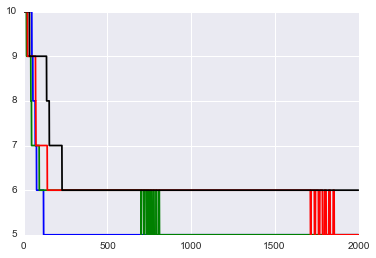

In [10]:
#Gráficas de riqueza
fig = plt.figure()
fig.add_subplot(111)
plt.plot(tiempo, riqueza1, color="blue")
plt.plot(tiempo, riqueza2, color="green")
plt.plot(tiempo, riqueza3, color="red")
plt.plot(tiempo, riqueza4, color="black")

#plt.ylim(ymax = 10, ymin = 0)
plt.xlim(xmax = 2000)
plt.show() 

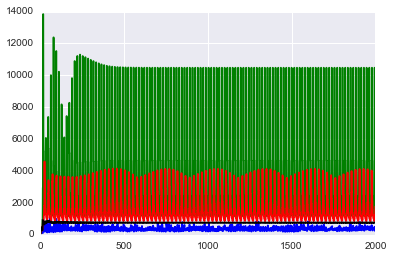

In [11]:
#Gráficas de biomasa
fig = plt.figure()
fig.add_subplot(111)
plt.plot(tiempo, biomasa1, color="blue")
plt.plot(tiempo, biomasa2, color="green")
plt.plot(tiempo, biomasa3, color="red")
plt.plot(tiempo, biomasa4, color="black")

#plt.ylim(ymax = 10, ymin = 0)
#plt.xlim(xmax = 2000)
plt.show()

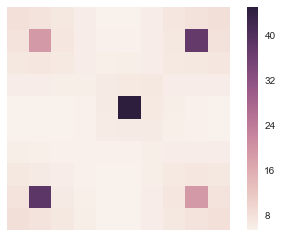

In [13]:
# Gráfica de biomasa en paisaje
biomasa_celda_4 = medidas_por_celda(poblacion4)[0]
seaborn.heatmap(biomasa_celda_4, square=True, yticklabels=False,
               xticklabels=False)

In [3]:
# Execute this cell to load the notebook's style sheet, then ignore it
# (From numericalmooc by Lorena Barba)
from IPython.core.display import HTML
css_file = "C:\Users\hp\Desktop\proyectof\style.css"
HTML(open(css_file, "r").read())